<!-- # Heart Disease Prediction -->
<h1 style="text-align:center">Heart Disease Prediction<h1>

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### LOAD DATASET

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.shape

(1025, 14)

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
data.rename(columns={'age': 'Age', 'sex': 'Sex', 'cp': 'ChestPainType', 'trestbps': 'RestingBloodPressure', 
                   'chol': 'SerumCholesterol', 'fbs': 'FastingBloodSugar', 'restecg': 'RestingECG', 
                   'thalach': 'MaxHeartRate', 'exang': 'ExerciseInducedAngina', 'oldpeak': 'STDepression', 
                   'slope': 'STSegmentSlope', 'ca': 'MajorVessels', 'thal': 'Thalassemia', 'target': 'Target'}, 
          inplace=True)

In [12]:
data1 = data.copy()

In [13]:
def change(sex):
    if(sex==0):
        return 'female'
    else:
        return 'male'
data1['Sex']=data['Sex'].apply(change)

In [14]:
def change1(target):
    if target==1:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
data1['Target']=data1['Target'].apply(change1)
        

In [15]:
data1['Target'].value_counts()

Target
No Heart Disease    526
Heart Disease       499
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender v/s target\n')

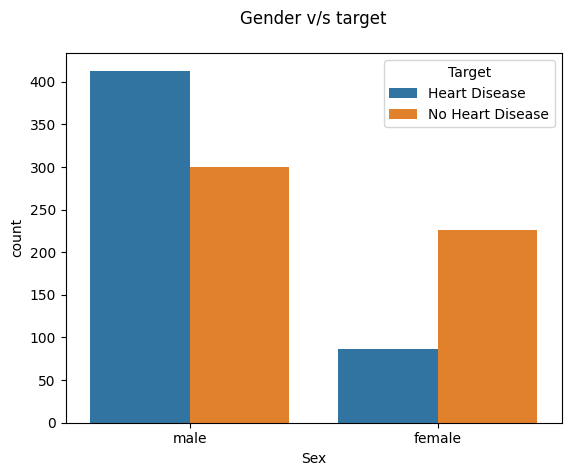

In [16]:
sns.countplot(data= data1, x='Sex',hue='Target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain v/s target\n')

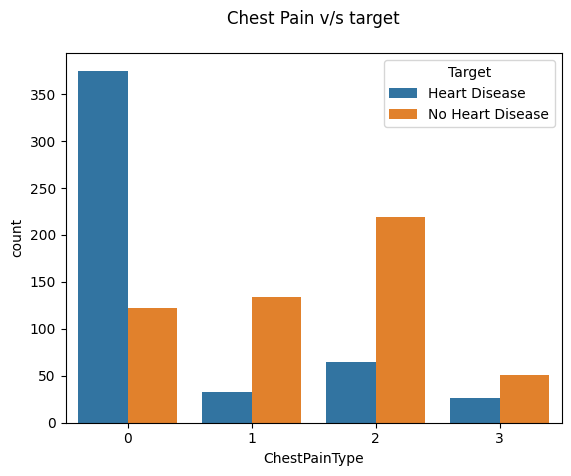

In [17]:
sns.countplot(data= data1, x='ChestPainType',hue='Target')
plt.title('Chest Pain v/s target\n')

Text(0.5, 1.0, 'Thalassemia v/s target\n')

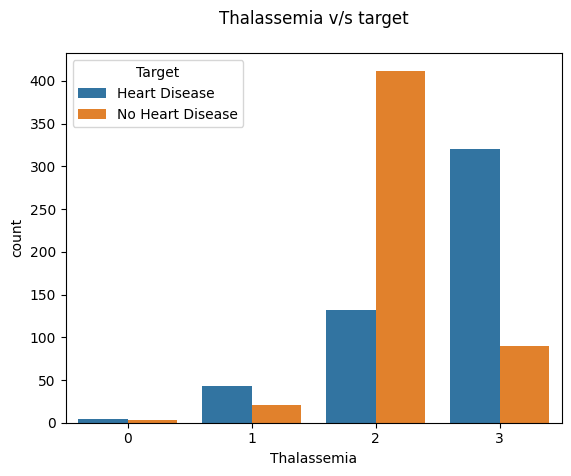

In [18]:
sns.countplot(data= data1, x='Thalassemia',hue='Target')
plt.title('Thalassemia v/s target\n')

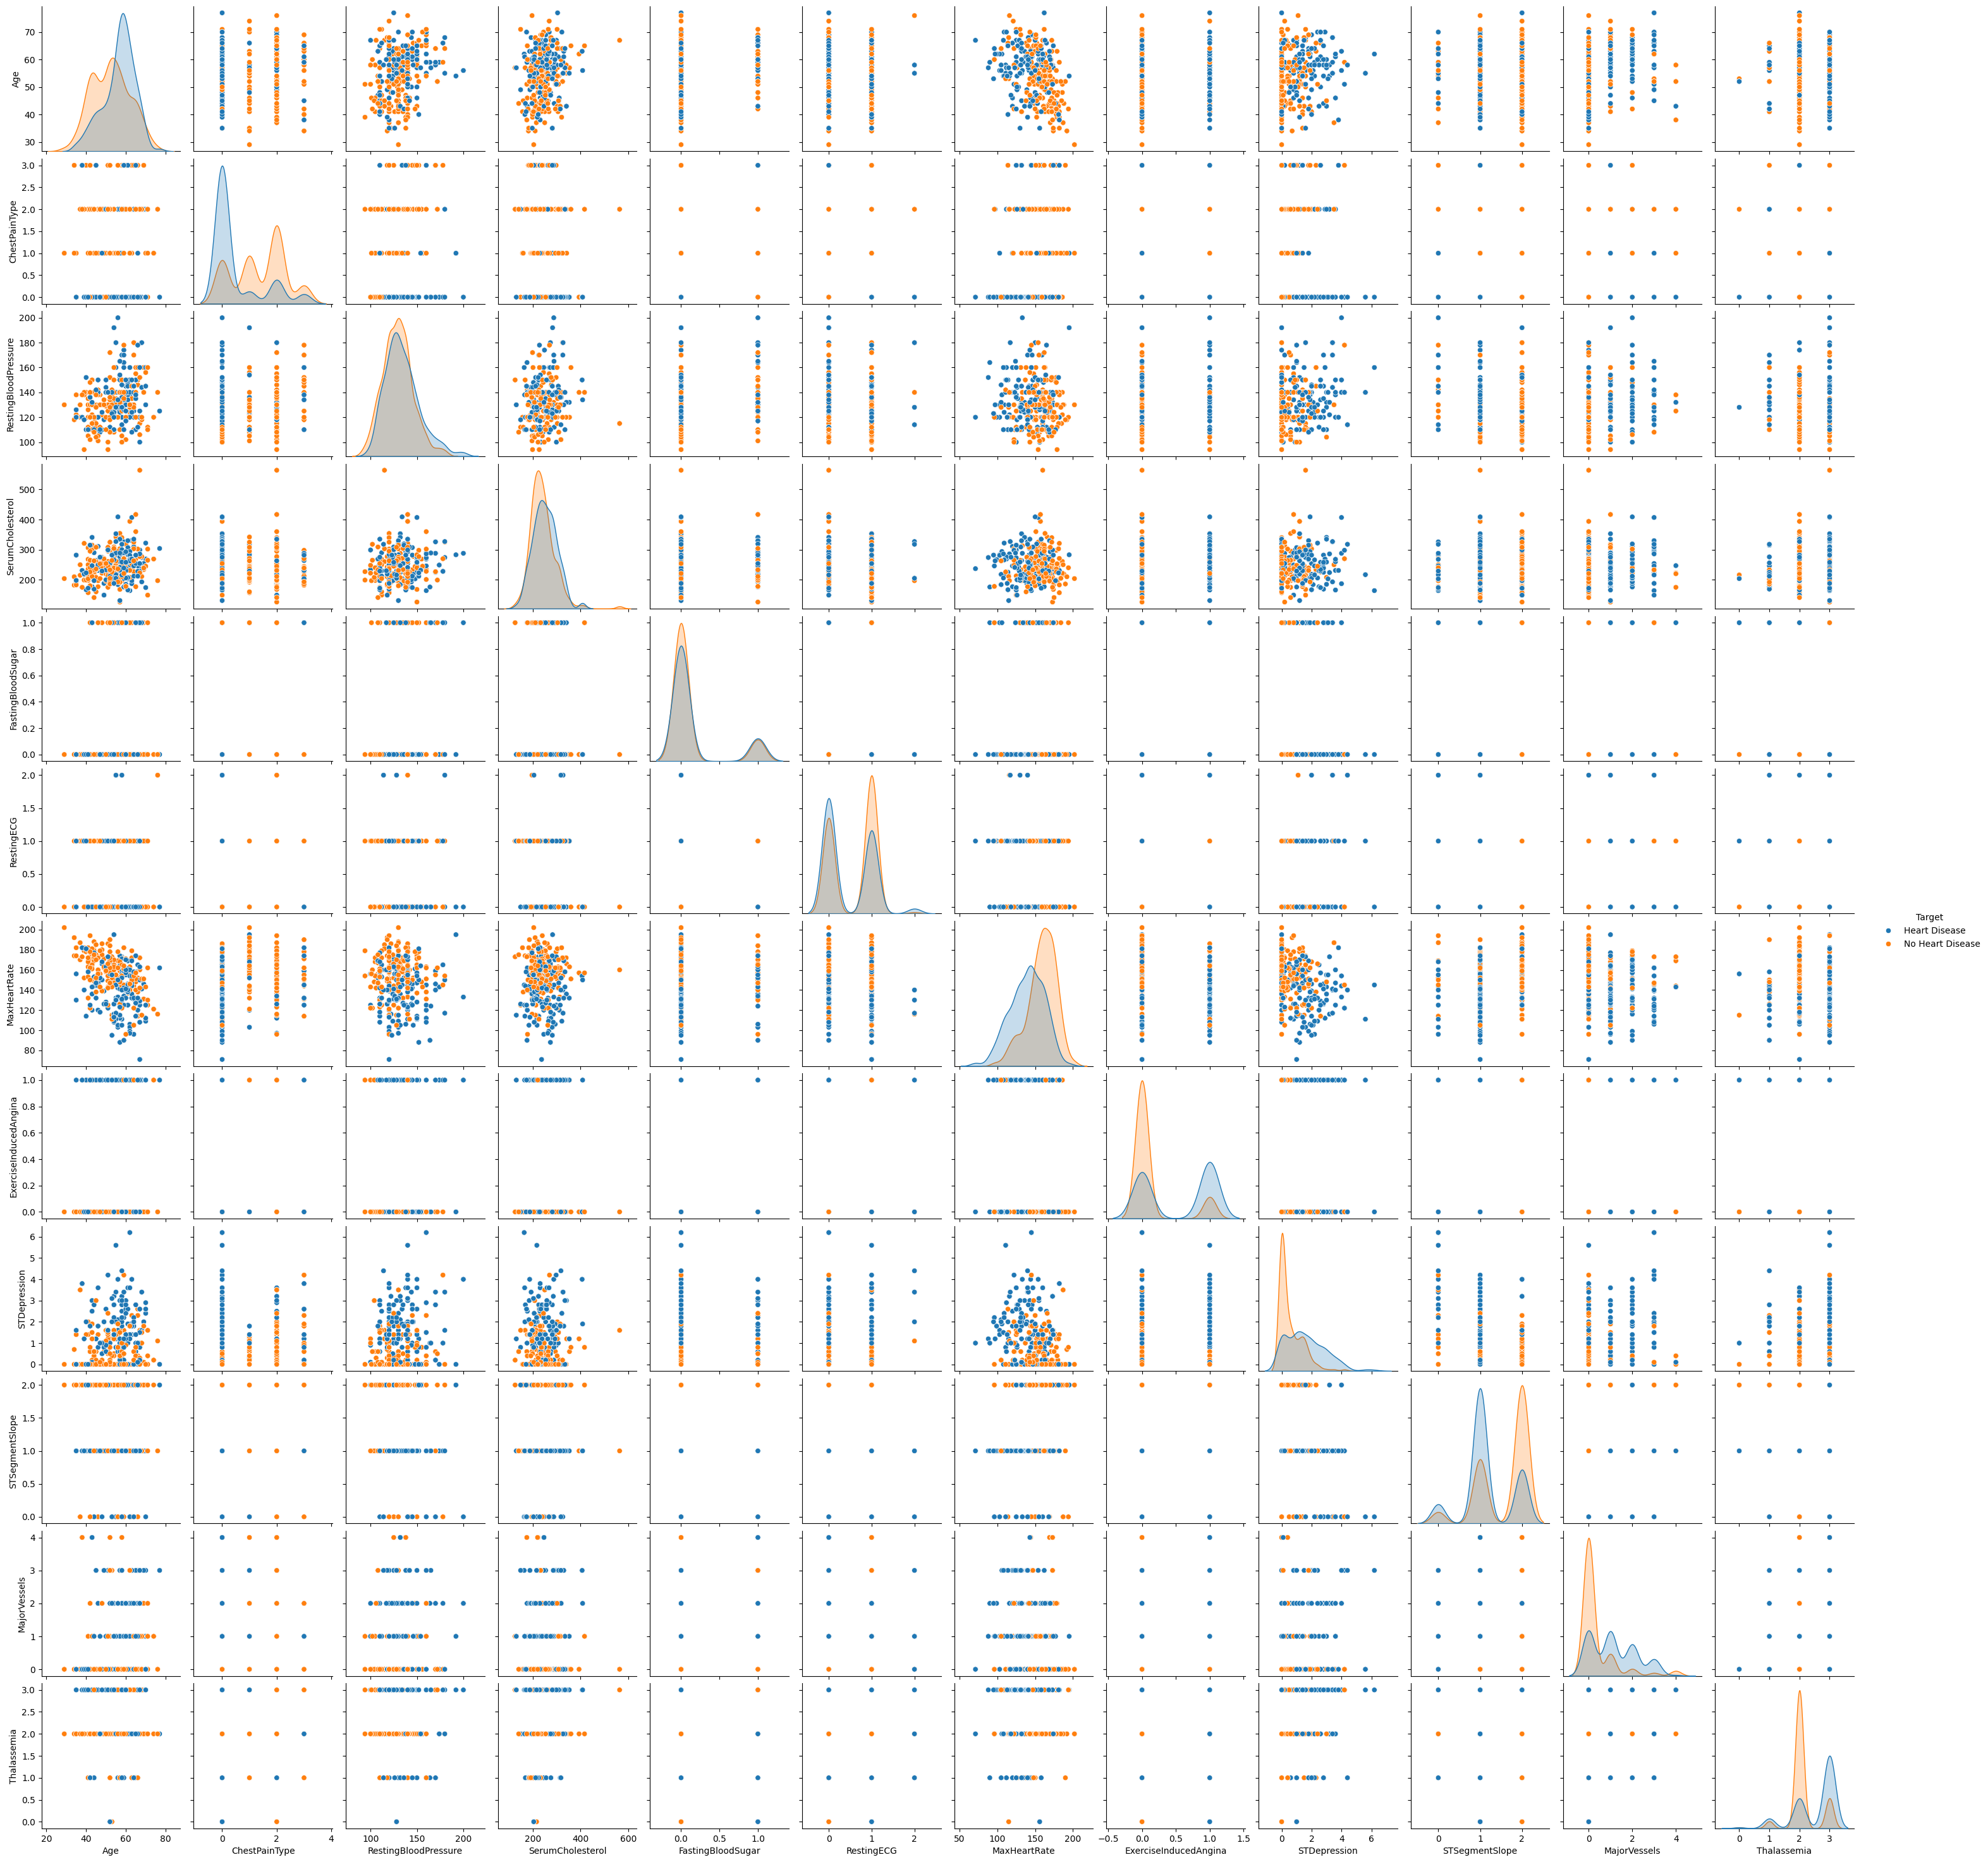

In [19]:
sns.pairplot(data1,hue="Target")

### TRAIN DATA

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=data.drop("Target",axis=1)

In [22]:
y=data["Target"]

In [23]:
print(X)

      Age  Sex  ChestPainType  RestingBloodPressure  SerumCholesterol  \
0      52    1              0                   125               212   
1      53    1              0                   140               203   
2      70    1              0                   145               174   
3      61    1              0                   148               203   
4      62    0              0                   138               294   
...   ...  ...            ...                   ...               ...   
1020   59    1              1                   140               221   
1021   60    1              0                   125               258   
1022   47    1              0                   110               275   
1023   50    0              0                   110               254   
1024   54    1              0                   120               188   

      FastingBloodSugar  RestingECG  MaxHeartRate  ExerciseInducedAngina  \
0                     0           1           1

In [24]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: Target, Length: 1025, dtype: int64


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [26]:
print(X_train)
# print(X_test)

      Age  Sex  ChestPainType  RestingBloodPressure  SerumCholesterol  \
14     52    1              0                   128               204   
586    64    1              2                   125               309   
16     51    0              2                   140               308   
462    52    1              3                   118               186   
186    40    1              0                   110               167   
...   ...  ...            ...                   ...               ...   
221    63    1              0                   130               254   
906    42    1              0                   140               226   
1002   66    1              0                   112               212   
966    58    1              0                   128               259   
191    56    1              1                   130               221   

      FastingBloodSugar  RestingECG  MaxHeartRate  ExerciseInducedAngina  \
14                    1           1           1

In [27]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

c:\Users\OM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\OM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.857317
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.986585
2,random_forest,{'n_estimators': 50},0.981707
3,svm,"{'C': 1, 'kernel': 'rbf'}",0.964634


### DecisionTreeClassifier

In [29]:
clf=DecisionTreeClassifier()

In [30]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred=clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

1.0

<Axes: >

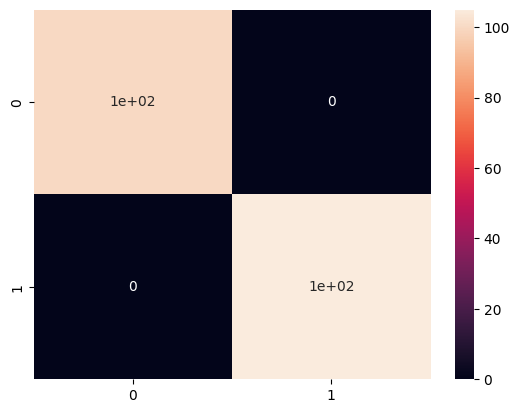

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [35]:
cm

array([[100,   0],
       [  0, 105]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) 

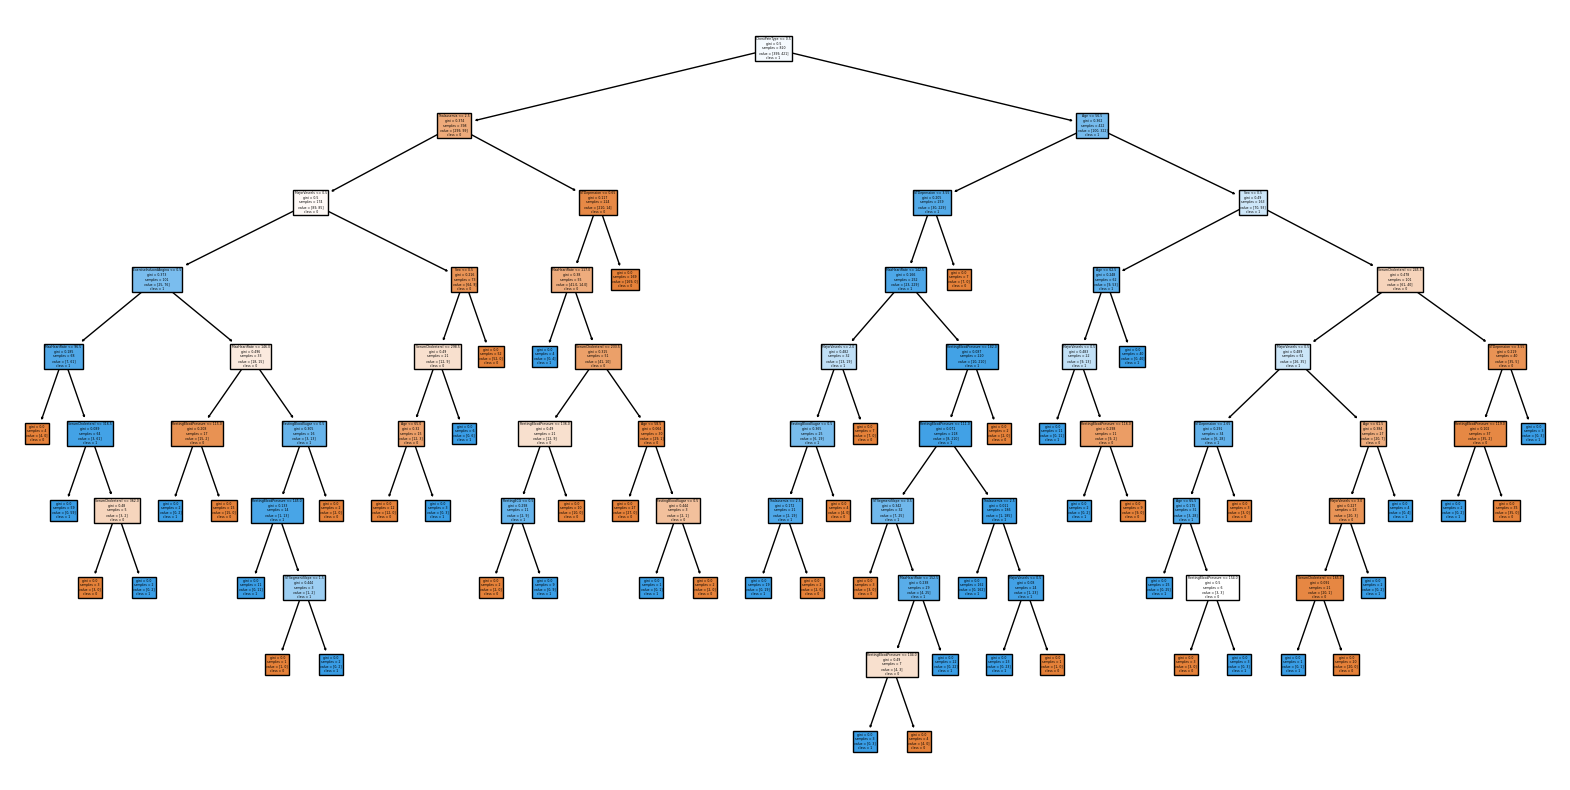

In [38]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns.to_list(), class_names=le.classes_.astype(str).tolist())
plt.show()

In [40]:
import joblib
joblib.dump(clf, 'heart.pkl')

['heart.pkl']

In [36]:
def get_input():
    print("Enter patient details:")
    age = int(input("Age (in years): "))
    sex = int(input("Sex (0: female, 1: male): "))
    cp = int(input("Chest pain type (0-3): "))
    trestbps = int(input("Resting blood pressure (in mm Hg): "))
    chol = int(input("Serum cholesterol (in mg/dL): "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (1: true, 0: false): "))
    restecg = int(input("Resting electrocardiographic results (0-2): "))
    thalach = int(input("Maximum heart rate achieved (in bpm): "))
    exang = int(input("Exercise induced angina (1: yes, 0: no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slope = int(input("Slope of the peak exercise ST segment (0-2): "))
    ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Thalassemia (0-3): "))
    
    return [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

patient_details = get_input()

print("\nPatient details:")
print("Age:", patient_details[0])
print("Sex:", "Female" if patient_details[1] == 0 else "Male")
print("Chest pain type:", patient_details[2])
print("Resting blood pressure:", patient_details[3], "mm Hg")
print("Serum cholesterol:", patient_details[4], "mg/dL")
print("Fasting blood sugar:", "True" if patient_details[5] == 1 else "False")
print("Resting electrocardiographic results:", patient_details[6])
print("Maximum heart rate achieved:", patient_details[7], "bpm")
print("Exercise induced angina:", "Yes" if patient_details[8] == 1 else "No")
print("ST depression induced by exercise relative to rest:", patient_details[9])
print("Slope of the peak exercise ST segment:", patient_details[10])
print("Number of major vessels colored by fluoroscopy:", patient_details[11])
print("Thalassemia:", patient_details[12])

input_data_as_numpy_array = np.asarray(patient_details)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = clf.predict(input_data_reshaped)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


Enter patient details:

Patient details:
Age: 59
Sex: Male
Chest pain type: 1
Resting blood pressure: 140 mm Hg
Serum cholesterol: 221 mg/dL
Fasting blood sugar: False
Resting electrocardiographic results: 1
Maximum heart rate achieved: 164 bpm
Exercise induced angina: Yes
ST depression induced by exercise relative to rest: 0.0
Slope of the peak exercise ST segment: 2
Number of major vessels colored by fluoroscopy: 0
Thalassemia: 2
The Person has Heart Disease


c:\Users\OM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
# prediction=model.predict(X_train)

In [39]:
# from sklearn.metrics import accuracy_score

In [29]:
def get_input():
    print("Enter patient details:")
    age = int(input("Age (in years): "))
    sex = int(input("Sex (0: female, 1: male): "))
    cp = int(input("Chest pain type (0-3): "))
    trestbps = int(input("Resting blood pressure (in mm Hg): "))
    chol = int(input("Serum cholesterol (in mg/dL): "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (1: true, 0: false): "))
    restecg = int(input("Resting electrocardiographic results (0-2): "))
    thalach = int(input("Maximum heart rate achieved (in bpm): "))
    exang = int(input("Exercise induced angina (1: yes, 0: no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slope = int(input("Slope of the peak exercise ST segment (0-2): "))
    ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Thalassemia (0-3): "))
    
    return [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

patient_details = get_input()

print("\nPatient details:")
print("Age:", patient_details[0])
print("Sex:", "Female" if patient_details[1] == 0 else "Male")
print("Chest pain type:", patient_details[2])
print("Resting blood pressure:", patient_details[3], "mm Hg")
print("Serum cholesterol:", patient_details[4], "mg/dL")
print("Fasting blood sugar:", "True" if patient_details[5] == 1 else "False")
print("Resting electrocardiographic results:", patient_details[6])
print("Maximum heart rate achieved:", patient_details[7], "bpm")
print("Exercise induced angina:", "Yes" if patient_details[8] == 1 else "No")
print("ST depression induced by exercise relative to rest:", patient_details[9])
print("Slope of the peak exercise ST segment:", patient_details[10])
print("Number of major vessels colored by fluoroscopy:", patient_details[11])
print("Thalassemia:", patient_details[12])

input_data_as_numpy_array = np.asarray(patient_details)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


Enter patient details:
Age (in years): 63
Sex (0: female, 1: male): 1
Chest pain type (0-3): 3
Resting blood pressure (in mm Hg): 145
Serum cholesterol (in mg/dL): 233
Fasting blood sugar > 120 mg/dl (1: true, 0: false): 1
Resting electrocardiographic results (0-2): 0
Maximum heart rate achieved (in bpm): 150
Exercise induced angina (1: yes, 0: no): 0
ST depression induced by exercise relative to rest: 2.3
Slope of the peak exercise ST segment (0-2): 0
Number of major vessels (0-3) colored by fluoroscopy: 0
Thalassemia (0-3): 1

Patient details:
Age: 63
Sex: Male
Chest pain type: 3
Resting blood pressure: 145 mm Hg
Serum cholesterol: 233 mg/dL
Fasting blood sugar: True
Resting electrocardiographic results: 0
Maximum heart rate achieved: 150 bpm
Exercise induced angina: No
ST depression induced by exercise relative to rest: 2.3
Slope of the peak exercise ST segment: 0
Number of major vessels colored by fluoroscopy: 0
Thalassemia: 1
The Person has Heart Disease


C:\Users\OM\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
pip install fpdf

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=c2e7df5977b15a8472d942003ed273f4b87f6f2cdcc2e75f84c7805bd4b22e1a
  Stored in directory: c:\users\om\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
